## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import Sequential 
from keras.layers import Dense 
from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD  
import matplotlib.pyplot as plt 

## Importing the CSV file 

In [2]:
df=pd.read_csv(r"C:\Users\sss\Downloads\Deep_Learning related\DL_CLASS\ASSIGNMENT_4\Multiple CSV\2.concerticcir1.csv",header=None) 
df.head()   

,0,1,2
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [4]:
df[2].value_counts() 

2
1.0    50
0.0    50
Name: count, dtype: int64

### Seperating the Input and Output Features

In [5]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int) 

In [6]:
x.head() 

,0,1
0,-0.382891,-0.090840
1,-0.020962,-0.477874
2,-0.396116,-1.289427
3,-0.618130,-0.063837
4,0.703478,-0.187038


In [7]:
y.head() 

0    1
1    1
2    0
3    1
4    1
Name: 2, dtype: int32

### Split the data into train and test 

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1) 

In [9]:
x_train.shape 

(90, 2)

In [10]:
x_test.shape 

(10, 2)

### Standardising input features

In [11]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)  

### Build the Logical Structure

In [12]:
model=Sequential()
model.add(Dense(18,activation="relu",kernel_regularizer=L1(0.001),bias_regularizer=L1(0.001),input_dim=2))
model.add(Dense(16,activation="relu",kernel_regularizer=L1(0.001),bias_regularizer=L1(0.001)))
model.add(Dense(10,activation="relu",kernel_regularizer=L1(0.001),bias_regularizer=L1(0.001)))
model.add(Dense(1,activation="sigmoid"))  


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                54        
                                                                 
 dense_1 (Dense)             (None, 16)                304       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 539 (2.11 KB)
Trainable params: 539 (2.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### compiling the model 

In [14]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=10,epochs=250,validation_split=0.1) 

Epoch 1/250
9/9 [==============================] - 2s 57ms/step - loss: 0.7964 - accuracy: 0.4691 - val_loss: 0.8069 - val_accuracy: 0.3333
Epoch 2/250
9/9 [==============================] - 0s 8ms/step - loss: 0.7950 - accuracy: 0.5309 - val_loss: 0.8055 - val_accuracy: 0.3333
Epoch 3/250
9/9 [==============================] - 0s 8ms/step - loss: 0.7937 - accuracy: 0.5802 - val_loss: 0.8040 - val_accuracy: 0.4444
Epoch 4/250
9/9 [==============================] - 0s 8ms/step - loss: 0.7929 - accuracy: 0.6420 - val_loss: 0.8024 - val_accuracy: 0.4444
Epoch 5/250
9/9 [==============================] - 0s 8ms/step - loss: 0.7914 - accuracy: 0.7160 - val_loss: 0.8013 - val_accuracy: 0.4444
Epoch 6/250
9/9 [==============================] - 0s 8ms/step - loss: 0.7905 - accuracy: 0.7037 - val_loss: 0.7987 - val_accuracy: 0.5556
Epoch 7/250
9/9 [==============================] - 0s 8ms/step - loss: 0.7892 - accuracy: 0.7407 - val_loss: 0.7951 - val_accuracy: 0.5556
Epoch 8/250
9/9 [=========

9/9 [==============================] - 0s 7ms/step - loss: 0.6656 - accuracy: 0.7654 - val_loss: 0.6767 - val_accuracy: 0.8889
Epoch 118/250
9/9 [==============================] - 0s 8ms/step - loss: 0.6646 - accuracy: 0.7654 - val_loss: 0.6701 - val_accuracy: 0.8889
Epoch 119/250
9/9 [==============================] - 0s 8ms/step - loss: 0.6615 - accuracy: 0.7654 - val_loss: 0.6655 - val_accuracy: 0.8889
Epoch 120/250
9/9 [==============================] - 0s 8ms/step - loss: 0.6598 - accuracy: 0.7531 - val_loss: 0.6663 - val_accuracy: 0.8889
Epoch 121/250
9/9 [==============================] - 0s 8ms/step - loss: 0.6576 - accuracy: 0.7778 - val_loss: 0.6694 - val_accuracy: 0.7778
Epoch 122/250
9/9 [==============================] - 0s 8ms/step - loss: 0.6567 - accuracy: 0.7531 - val_loss: 0.6674 - val_accuracy: 0.7778
Epoch 123/250
9/9 [==============================] - 0s 8ms/step - loss: 0.6550 - accuracy: 0.7654 - val_loss: 0.6710 - val_accuracy: 0.8889
Epoch 124/250
9/9 [========

9/9 [==============================] - 0s 7ms/step - loss: 0.4412 - accuracy: 0.8889 - val_loss: 0.4782 - val_accuracy: 0.7778
Epoch 234/250
9/9 [==============================] - 0s 8ms/step - loss: 0.4391 - accuracy: 0.8889 - val_loss: 0.4594 - val_accuracy: 0.8889
Epoch 235/250
9/9 [==============================] - 0s 8ms/step - loss: 0.4380 - accuracy: 0.8642 - val_loss: 0.4592 - val_accuracy: 0.7778
Epoch 236/250
9/9 [==============================] - 0s 8ms/step - loss: 0.4376 - accuracy: 0.8765 - val_loss: 0.4495 - val_accuracy: 0.7778
Epoch 237/250
9/9 [==============================] - 0s 8ms/step - loss: 0.4336 - accuracy: 0.8765 - val_loss: 0.4648 - val_accuracy: 0.7778
Epoch 238/250
9/9 [==============================] - 0s 8ms/step - loss: 0.4346 - accuracy: 0.8642 - val_loss: 0.4596 - val_accuracy: 0.7778
Epoch 239/250
9/9 [==============================] - 0s 9ms/step - loss: 0.4315 - accuracy: 0.8642 - val_loss: 0.4468 - val_accuracy: 0.8889
Epoch 240/250
9/9 [========

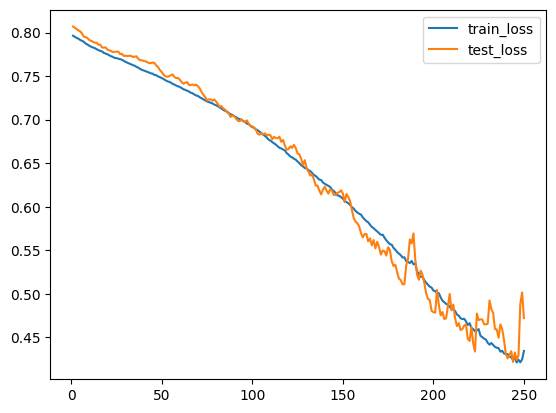

In [15]:
plt.plot(range(1,251),history.history["loss"],label="train_loss")
plt.plot(range(1,251),history.history["val_loss"],label="test_loss") 
plt.legend()

### Predicting the model 

In [16]:
predicted=model.predict(x_test) 
predicted 

1/1 [==============================] - 0s 143ms/step


array([[0.06475859],
       [0.83319086],
       [0.91928613],
       [0.16709366],
       [0.18805405],
       [0.17468198],
       [0.91204894],
       [0.41915622],
       [0.87988776],
       [0.75237083]], dtype=float32)

In [17]:
predicted=np.where(predicted>0.5,1,0)
predicted  

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1]])

### Evaluating the model

1.0


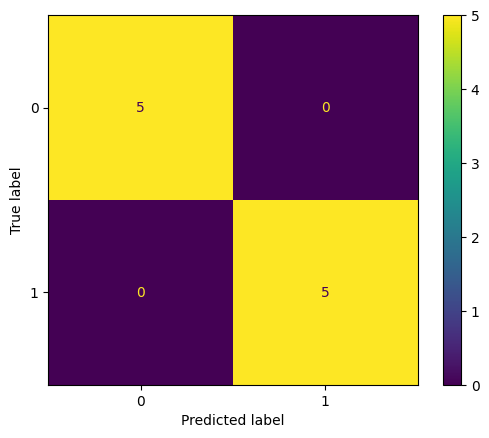

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()

### PLOTING THE DECISION SURFACE

In [19]:
from mlxtend.plotting  import plot_decision_regions  

9600/9600 [==============================] - 20s 2ms/step


<Axes: >

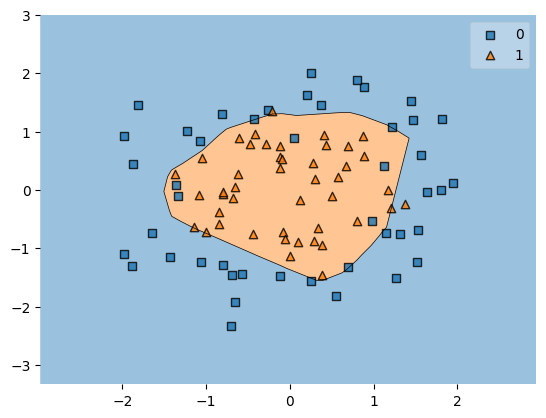

In [20]:
plot_decision_regions(x_train,y_train.values,clf=model) 

9600/9600 [==============================] - 24s 2ms/step


<Axes: >

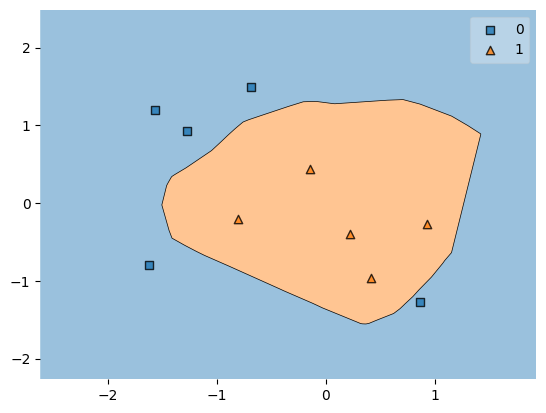

In [21]:
plot_decision_regions(x_test,y_test.values,clf=model)  

### Conclusions:
###### This neural network model achieves an accuracy of 90%. The model architecture consists of 3 hidden layers with the following specifications:

- In the first hidden layer, there are 18 neurons with the ReLU activation function and an L1 regularizer with a strength of 0.001.
- In the second hidden layer, there are 16 neurons with the ReLU activation function and an L1 regularizer with a strength of 0.001.
- In the third hidden layer, there are 10 neurons with the ReLU activation function and an L1 regularizer with a strength of 0.001.

###### The output layer uses the sigmoid activation function.

##### For model compilation, the following settings were used:

###### Loss function: Binary cross-entropy.
- Optimizer: Stochastic Gradient Descent (SGD) with a batch size of 10 and a learning rate of 0.01.
- The model was trained for 250 epochs.
 
###### Overall, this neural network model architecture and training configuration achieve an accuracy of 90%.